+# Nearest Neighbor: Algorithm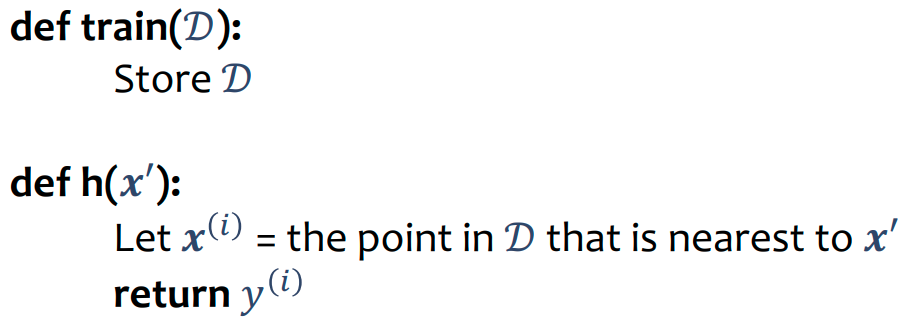

#Requires no training!


> Always has zero training error!


> A data point is always its own nearest neighbor


# k-Nearest Neighbors: Algorithm

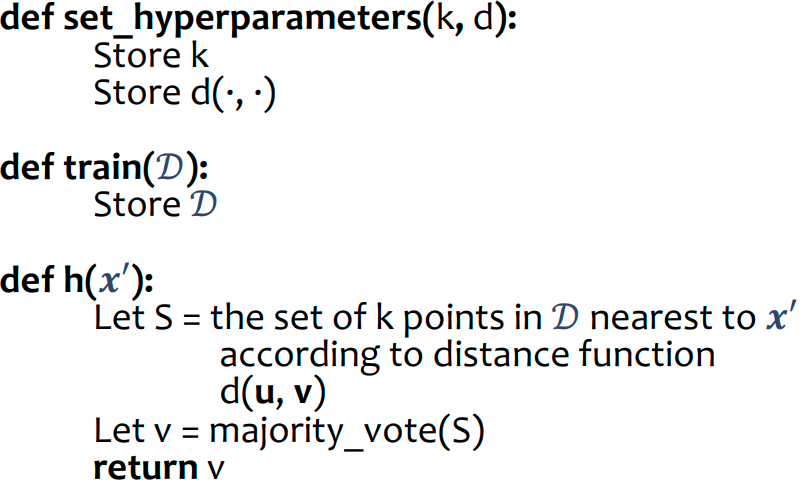

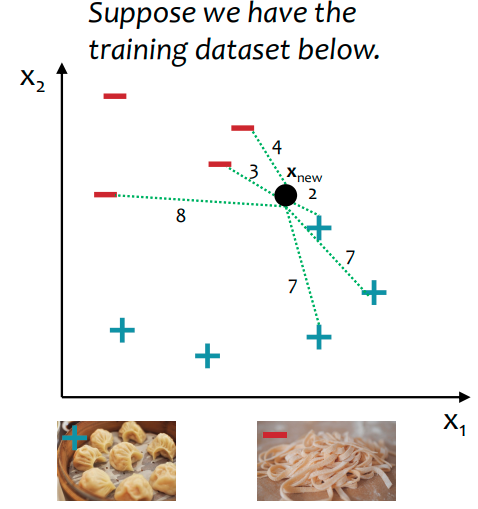

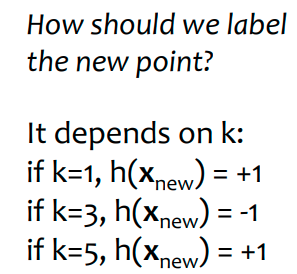

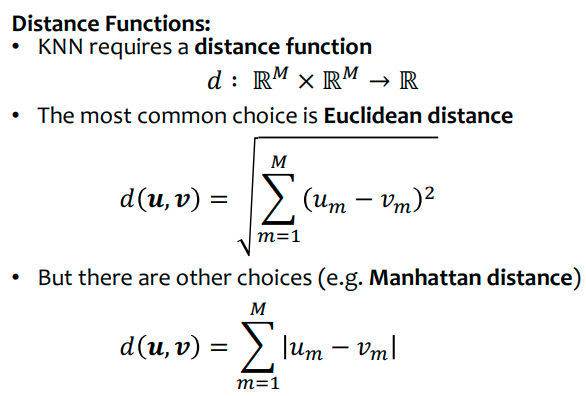

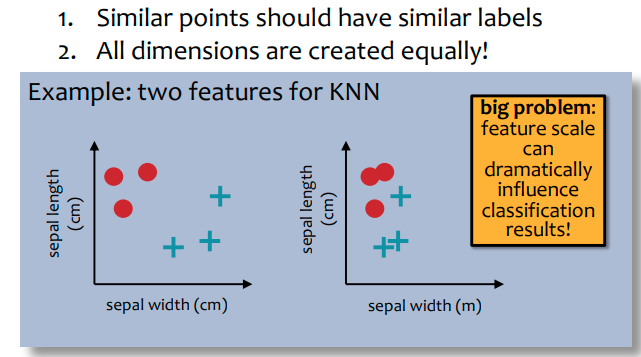

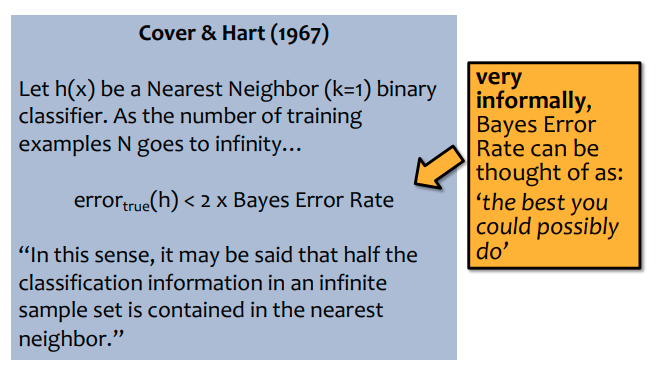

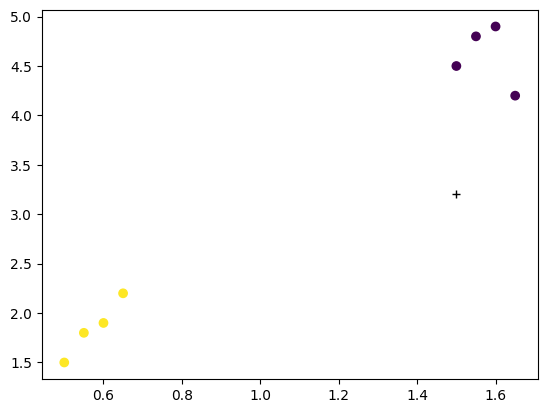

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X= np.array([[0.5,1.5],[0.55, 1.8],[0.6,1.9],[0.65,2.2],[1.5,4.5],[1.55, 4.8],[1.6,4.9],[1.65,4.2]])
y = [1,1,1,1,0,0,0,0]
X_test = np.array([[1.5,3.2]])
plt.scatter(X[:,0],X[:,1],c=y)
#plt.axis([0,5,0,8])
plt.plot(X_test[:,0],X_test[:,1],'+k')

In [ ]:
a=(X-X_test)**2
print(a)

[[1.000e+00 2.890e+00]
 [9.025e-01 1.960e+00]
 [8.100e-01 1.690e+00]
 [7.225e-01 1.000e+00]
 [0.000e+00 1.690e+00]
 [2.500e-03 2.560e+00]
 [1.000e-02 2.890e+00]
 [2.250e-02 1.000e+00]]


In [ ]:
b=np.sum(a,axis=1)
dist = np.sqrt(b)

print(dist)

dist_list = []
for i in range(len(y)):
  dist_list.append((y[i],dist[i]))

print(dist_list)

[1.97230829 1.69189243 1.58113883 1.31244047 1.3        1.60078106
 1.70293864 1.01118742]
[(1, 1.9723082923316022), (1, 1.691892431568863), (1, 1.58113883008419), (1, 1.3124404748406686), (0, 1.2999999999999998), (0, 1.6007810593582117), (0, 1.7029386365926404), (0, 1.0111874208078342)]


In [ ]:
# take second element for sort
def takeSecond(elem):
    return elem[1]

# random list
random = [(2, 2), (3, 4), (4, 1), (1, 3)]

# sort list with key
random.sort(key=takeSecond)

# print list
print('Sorted list:', random)

Sorted list: [(4, 1), (2, 2), (1, 3), (3, 4)]


In [ ]:
dist_list.sort(key = takeSecond)
print(dist_list)

[(0, 1.0111874208078342), (0, 1.2999999999999998), (1, 1.3124404748406686), (1, 1.58113883008419), (0, 1.6007810593582117), (1, 1.691892431568863), (0, 1.7029386365926404), (1, 1.9723082923316022)]


In [ ]:
from collections import Counter
k = 3
 #get top k nearest neighbours
neighbours =dist_list[:k]
print(neighbours)
#get index of the minimum distances
idx = []
for tup in neighbours:
    idx.append(tup[0])
print(idx) # idx = [1, 1, 1]
classIdx = max(idx,key=idx.count) # maximum occurance of which element in list
print('classified as class-',classIdx)

[(0, 1.0111874208078342), (0, 1.2999999999999998), (1, 1.3124404748406686)]
[0, 0, 1]
classified as class- 0


[(0, 0.1414213562373093), (0, 0.2061552812808832), (0, 0.5)]


0

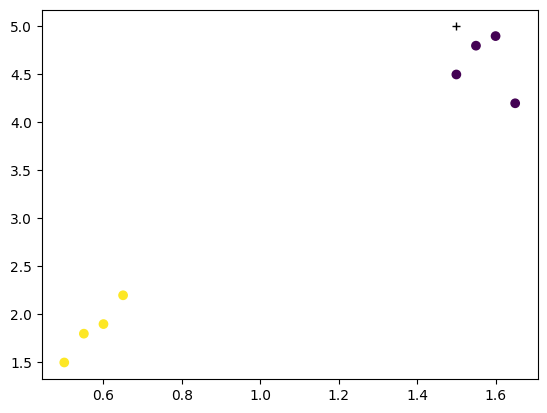

In [ ]:
# kNN prediction for single  data

def takeSecond(elem):
    return elem[1]

def plotData(Xtrain,Xtest,y):
  plt.scatter(Xtrain[:,0],Xtrain[:,1],c=y)
  #plt.axis([0,5,0,8])
  plt.plot(Xtest[:,0],Xtest[:,1],'+k')

def KNNClassifierPredict_single(XTrain,YTrain,k,X_test):
  plotData(XTrain,X_test,y)
  dist = np.sqrt(np.sum((X-X_test)**2,axis=1))
  dist_list = []
  for i in range(len(y)):
    dist_list.append((y[i],dist[i]))

  dist_list.sort(key = takeSecond)
  neighbours = dist_list[:k]
  print(neighbours)
  #get index of the minimum distances
  idx = []
  for tup in neighbours:
      idx.append(tup[0])
  #print(idx) # idx = [1, 1, 1]
  label = max(idx,key=idx.count)
  #print(label) # maximum occurance of which element in list
  return label


X= np.array([[0.5,1.5],[0.55, 1.8],[0.6,1.9],[0.65,2.2],[1.5,4.5],[1.55, 4.8],[1.6,4.9],[1.65,4.2]])
y = [1,1,1,1,0,0,0,0]
X_test = np.array([[1.5,5]])

KNNClassifierPredict_single(X,y,3,X_test)



In [ ]:
# kNN prediction for multiple data

def takeSecond(elem):
    return elem[1]

def plotData(Xtrain,Xtest,y):
  plt.scatter(Xtrain[:,0],Xtrain[:,1],c=y)
  plt.axis([0,5,0,8])
  plt.scatter(Xtest[:,0],Xtest[:,1],'+k')


def KNNClassifierPredict_multi(XTrain,YTrain,k,X_test):
  label = []
  for p in range(X_test.shape[0]):
    dist = np.sqrt(np.sum((X-X_test[p])**2,axis=1))
    dist_list = []
    for i in range(len(y)):
      dist_list.append((y[i],dist[i]))

    dist_list.sort(key = takeSecond)
    neighbours = dist_list[:k]
    #print(neighbours)
    #get index of the minimum distances
    idx = []
    for tup in neighbours:
        idx.append(tup[0])
    #print(idx) # idx = [1, 1, 1]
    label.append(max(idx,key=idx.count))
    #print(label) # maximum occurance of which element in list
  return label


X= np.array([[0.5,1.5],[0.55, 1.8],[0.6,1.9],[0.65,2.2],[1.5,4.5],[1.55, 4.8],[1.6,4.9],[1.65,4.2]])
y = [1,1,1,1,0,0,0,0]
X_test = np.array([[2.1,3.2],[6.1,1.1],[1,9.1]])
X_test = np.random.rand(10,2)*7

Q = KNNClassifierPredict_multi(X,y,3,X_test)
Q = np.array(Q).reshape(None)
print(Q)



[0 0 0 0 0 1 0 0 0 1]


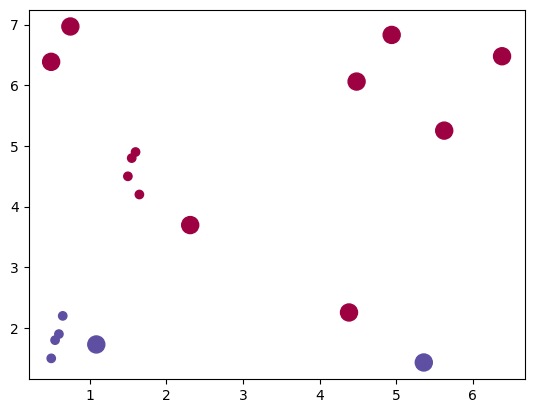

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral )
plt.scatter(X_test[:,0],X_test[:,1],c=Q,s = 150,cmap=plt.cm.Spectral)

(170100, 1)
(10,)


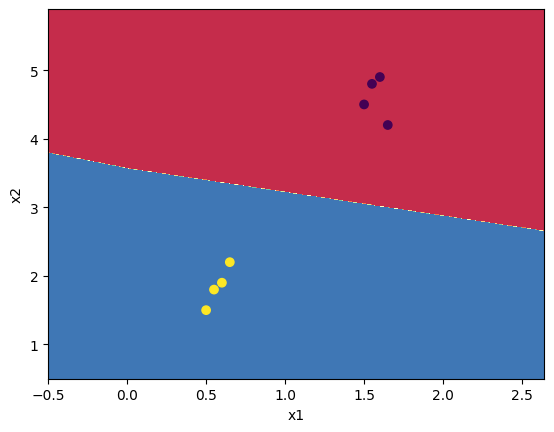

In [ ]:
# Plotting Decision Boundary


 # Set min and max values and give it some padding
x_min, x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
h = 0.01
#print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()])

P = KNNClassifierPredict_multi(X,y,3,Xn)
P = np.array(P).reshape(-1,1)
print(P.shape)
P = P.reshape(xx.shape)
print(Q.shape)
t = [10, 1]
plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c = y)

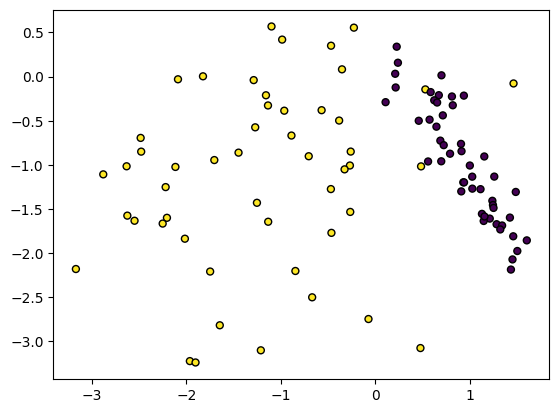

In [ ]:
## KNN with Nonlinea Decision Boundary

from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, random_state=10, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

[[ -4.65607735   7.19773628]
 [ -0.46243291   2.5820512 ]
 [ -7.61708676 -10.60737603]
 [ -2.79858755  -4.09481279]
 [  8.79748663  -4.56709437]
 [ -7.95863052   6.15210581]
 [ -4.50659947   6.45350717]
 [-10.88042481 -10.27004404]
 [  5.82453775 -11.01338706]
 [ -9.71625065   4.54523483]
 [ -3.59719985  -9.11648174]
 [ -2.01896377   5.29854338]
 [  9.19582966 -11.78086952]
 [  2.09063161  -7.86587387]
 [  6.22294762  -9.25931544]
 [ -6.18286668   3.76825222]
 [  5.19963891   5.58682004]
 [ -0.21559584  -7.76574597]
 [  9.88002387 -12.82437567]
 [ -9.40805481   4.0444304 ]
 [ -6.90163095   1.13268252]
 [  3.67875622   1.89190816]
 [  1.97641793   3.47089095]
 [ -9.69204217  -7.75200623]
 [ -4.90548345  10.05383817]
 [ -2.97119438   5.71104505]
 [  0.84896242  -6.91648884]
 [  4.6126689   -7.74534846]
 [-11.75099686  -6.39631178]
 [  2.47542116  -1.41905867]
 [  4.11983693  -4.46536774]
 [  7.18311706  -7.7221373 ]
 [  5.43928716 -10.10876164]
 [ -0.91781131  -2.95944126]
 [ -5.04169286

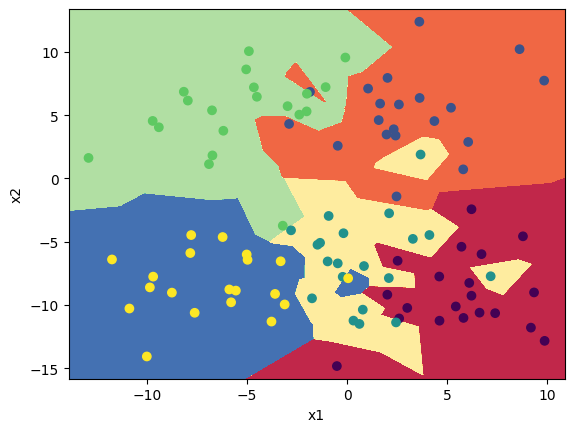

In [ ]:
# Plotting Decision Boundary


 # Set min and max values and give it some padding
x_min, x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
h = 0.01
print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()])

P = KNNClassifierPredict_multi(X,y,1,Xn)
P = np.array(P).reshape(-1,1)
print(P.shape)
P = P.reshape(xx.shape)
print(Q.shape)
t = [10, 1]
plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c = y)

# Multiclass classification using KNN

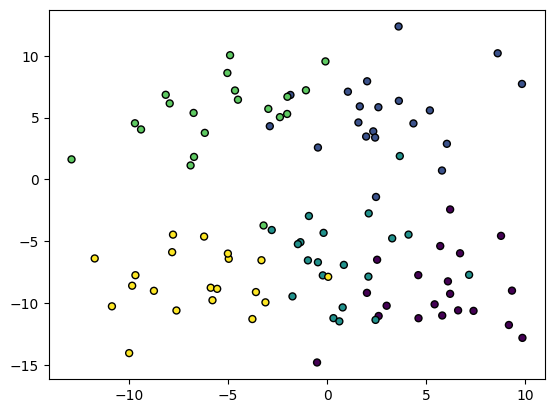

In [ ]:
from sklearn.datasets import make_blobs
from sklearn import preprocessing

K = 5 # number of class
spread = 3
RS = 10
X,y = make_blobs(n_samples=K*20, centers=K,\
                       cluster_std=spread, random_state=RS)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [ ]:
# Plotting Decision Boundary


 # Set min and max values and give it some padding
x_min, x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
h = 0.1
#print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()])

P = KNNClassifierPredict_multi(X,y,25,Xn)
P = np.array(P).reshape(-1,1)
print(P.shape)
P = P.reshape(xx.shape)


(72708, 1)


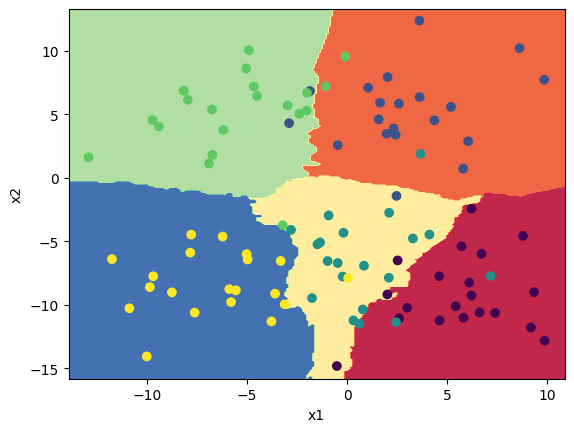

In [ ]:
plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c = y)